In [85]:
import sys
sys.path.append('..')
from data import RecordStore, Record
from sklearn.neural_network import MLPClassifier
import pickle
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
RecordStore.load()
RecordStore.load_w2v()

In [4]:
with open('../github_data/trainTest.pk', 'rb') as f:
    classes = pickle.load(f)
num_classes = 15
len(classes), classes

(15,
 ['P', 'D', 'Q', 'K', 'E', 'H', 'F', 'T', 'S', 'R', 'G', 'B', 'N', 'L', 'J'])

In [13]:
RecordStore.train_records[0].title_embeddings_w2v.shape

(3, 300)

In [79]:
def get_average_embedding(embeddings):
    if len(embeddings) == 0:
        return np.zeros(300)
    else:
        return np.mean(embeddings, axis = 0)

# class_embs = dict.fromkeys(classes)
# for c in classes: class_embs[c] = [[], []]

# for record in RecordStore.train_records:
#     class_embs[record.cls][0].append(get_average_embedding(record.title_embeddings_w2v))
#     class_embs[record.cls][1].append(get_average_embedding(record.synopsis_embeddings_w2v))

# for c in class_embs.keys():
#     class_embs[c][0] = np.mean(np.array(class_embs[c][0]), axis=0)
#     class_embs[c][1] = np.mean(np.array(class_embs[c][1]), axis=0)

In [107]:
X = []
for record in RecordStore.train_records:
    X.append(get_average_embedding(record.title_embeddings_w2v))
X = np.array(X)

In [101]:
pca = PCA(n_components=2).fit(X)
proj = pca.transform(X)

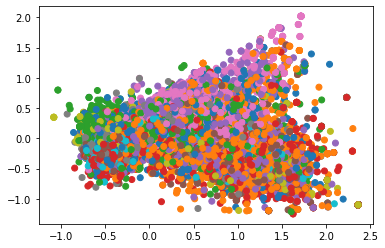

In [99]:
class_to_color = dict.fromkeys(classes)
for i, c in enumerate(classes):
    class_to_color[c] = 'C{}'.format(i)
colors = [class_to_color[record.cls] for record in RecordStore.train_records]
    
# plt.plot(proj[:,0], proj[:,1], class_to_color[])
plt.scatter(proj[:,0], proj[:,1], c=colors)

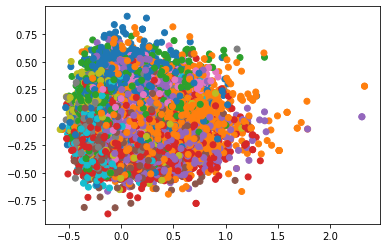

In [102]:
class_to_color = dict.fromkeys(classes)
for i, c in enumerate(classes):
    class_to_color[c] = 'C{}'.format(i)
colors = [class_to_color[record.cls] for record in RecordStore.train_records]
    
# plt.plot(proj[:,0], proj[:,1], class_to_color[])
plt.scatter(proj[:,0], proj[:,1], c=colors)

In [108]:
from sklearn.manifold import TSNE
tsne = TSNE(2)
proj = tsne.fit_transform(X)

/home/ahmadph/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ahmadph/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


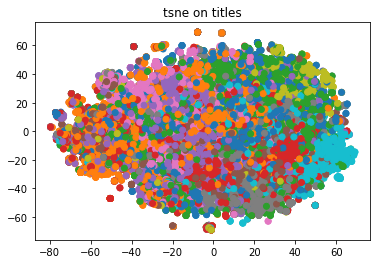

In [109]:
class_to_color = dict.fromkeys(classes)
for i, c in enumerate(classes):
    class_to_color[c] = 'C{}'.format(i)
colors = [class_to_color[record.cls] for record in RecordStore.train_records]
    
# plt.plot(proj[:,0], proj[:,1], class_to_color[])
plt.scatter(proj[:,0], proj[:,1], c=colors, )
plt.title('tsne on titles')
plt.show()

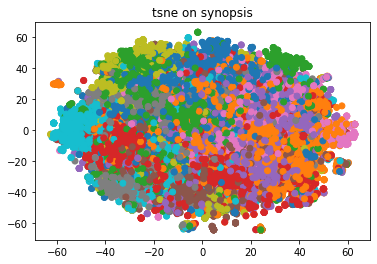

In [106]:
class_to_color = dict.fromkeys(classes)
for i, c in enumerate(classes):
    class_to_color[c] = 'C{}'.format(i)
colors = [class_to_color[record.cls] for record in RecordStore.train_records]
    
# plt.plot(proj[:,0], proj[:,1], class_to_color[])
plt.scatter(proj[:,0], proj[:,1], c=colors, )
plt.title('tsne on synopsis')
plt.show()